14.43448806732786 lyr


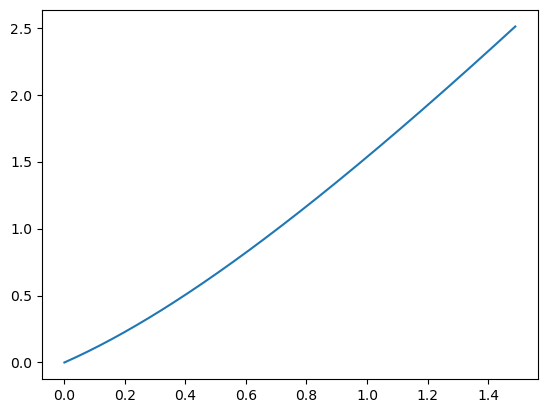

In [1]:
%matplotlib inline
import matplotlib
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, curve_fit
from scipy.stats import chisquare
from astropy.cosmology import Planck15
from astropy import constants as cc, units as uu
import parameters

DefaultSize=[10,6]
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 14,
        }
axis_font = {'name':'Arial', 'size':'18'}

title_font = {'name':'Arial', 'size':'18'}

def d_planck15(z):
    R0 = (cc.c)/(Planck15.H0)
    d_L = (Planck15.luminosity_distance(z))/R0.to(uu.Mpc)
    plt.plot(z, d_L)
    R0=R0.to(uu.lyr)/1e9
    return R0,d_L
z = np.arange(0.0,1.5,0.01)
R0_GLY,d_L=d_planck15(z)
R0_GLY_CMB=R0_GLY
print(R0_GLY)
HubbleGRData=pd.DataFrame()
HubbleGRData['z']=z
HubbleGRData['d']=d_L

# http://astronomy.swin.edu.au/cosmos/D/Distance+Modulus


SCPData = pd.ExcelFile('./DataSupernovaLBLgov/SCPUnionData.xlsx').parse('Sheet2')
angle=math.pi/4
# First let's create a set of lambda-shifts
z = SCPData['redshift']


In [19]:
SCPData

,SN,r,d,redshift,mv,Mv,DistanceModulus,d.1,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,K-000,25.394200,25.419734,1.414000,44.803766,0.346181,44.457585,2.388312,10.643389,3.261564e+09,-0.100449
1,04Sas,27.437092,27.464784,1.390000,44.876234,0.250632,44.625602,2.580445,10.643430,NaN,-0.100828
2,04Mcg,29.553613,29.583549,1.370000,45.049713,0.262748,44.786965,2.779503,10.643468,NaN,-0.101193
3,G-004,27.636918,27.664822,1.350000,44.827065,0.185705,44.641360,2.599239,10.643433,NaN,-0.100864
4,2003dy,29.628912,29.658928,1.340000,45.067506,0.275015,44.792490,2.786585,10.643470,NaN,-0.101205
...,...,...,...,...,...,...,...,...,...,...,...
575,2007ca,0.237496,0.237680,0.015100,34.525875,0.213682,34.312193,0.022336,10.640948,NaN,-0.077535
576,2005bo,0.185196,0.185338,0.015027,33.950192,0.178117,33.772074,0.017418,10.640818,NaN,-0.076315
577,2006td,0.221668,0.221839,0.015000,34.379773,0.217349,34.162424,0.020848,10.640912,NaN,-0.077197
578,1999aa,0.205886,0.206045,0.015000,34.163504,0.161453,34.002051,NaN,NaN,NaN,-0.076834


# Below is the application of the theory to the usd Wil Supernova (z=1.917)

In [17]:
# Cosmological Angle
def alpha(z):
    return [math.pi/4 - math.asin(1/math.sqrt(2)/(1+x)) for x in z]
# 4D Radius of the Universe
def RofT(z):
    a = alpha(z)
    return [math.cos(x) - math.sin(x) for x in a]
# Distance to the Epoch
def DistanceOfT(z):
    d= 14.04
    return [(1-x)*d for x in RofT(z)]

Size in Inches [6. 6.]


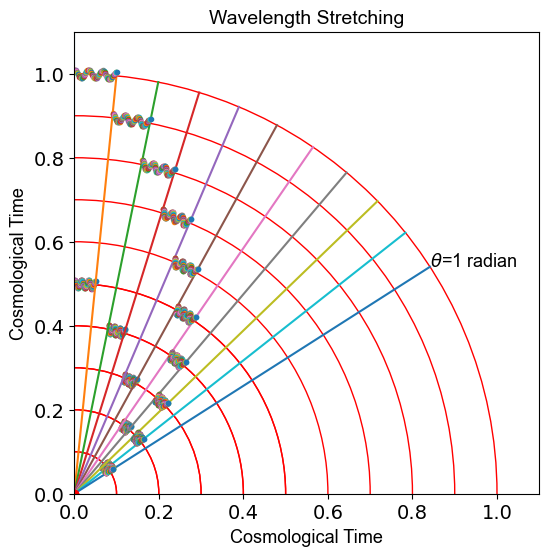

In [18]:
DefaultSize=[6,6]

font = {
        'weight' : 'regular',
        'size'   : 14}

matplotlib.rc('font', **font)
title_font = {'name':'Arial', 'size':'14'}

axis_font = {'name':'Arial', 'size':'13'}
label_font = {'name':'Arial', 'size':'13'}
fig, ax = plt.subplots()  
fig.set_size_inches( DefaultSize )# resetthe size
Size = fig.get_size_inches()
print ("Size in Inches", Size)
# print(radius)
plt.axis([0, 1.1, 0, 1.1])
plt.plot([0,0],[0,1.1])


def plotAncientPhotons(fig, ax, n=10, rays=False):
    # define radiuses
    radius = [x/10 for x in range(n+1)]
    thetas = [x/n for x in range(1,n+1)]
# Create the circles
    for i in range(0,n+1):
        rad=i/10
        ax.add_artist(plt.Circle(xy=(0,0),radius=rad, color='r', fill=False)) 
        
# create the meridians
    if rays:
        for i in range(0,n):
            r=n/10
            x1=[r*np.sin(thetas[i]),r*np.cos(thetas[i])]
            plt.plot([0,x1[0]],[0,x1[1]] )
            
# Create the sinusoidals
    for j in range(0, n):
        x=[]
        y=[]
        miniangle=np.linspace(0,6*np.pi,100)
        miniangletheta=np.linspace(0,0.1,100)
        angle=1-thetas[j]+miniangletheta
        rad=radius[j+1]+0.01*np.cos(miniangle)
        x.append(rad*np.sin(angle))
        y.append(rad*np.cos(angle))
        plt.plot(x,y,".")
    return ax
            
 
ax=plotAncientPhotons(fig, ax, n=5)   
ax=plotAncientPhotons(fig, ax, n=10, rays=True)   

ax.plot([0,0],[0,0],'ro')
ax.set_xlabel("Cosmological Time", **label_font)
ax.set_ylabel("Cosmological Time", **label_font)
ax.set_title("Wavelength Stretching", fontdict=title_font)
plt.text(np.sin(1),np.cos(1), r'$\theta$=1 radian', **axis_font)
ax.ticklabel_format(style='sci', axis='x') 
ax.ticklabel_format(style='sci', axis='y') 
plt.savefig(parameters.imgAddress + "WavelengthStretching.png", dpi=200)

In [15]:
def createlines(xran, yran, initialpoint, tang, nlines,ax=None):
    xrange=xran[1]-xran[0]/nlines
    yrange=yran[1]-yran[0]/nlines
    lastx=initialpoint[0]
    lasty=initialpoint[1]
    for i in range(nlines):
        xpoints=np.linspace(xran[1],xran[1],20)
        ypoints=lasty+tang*xpoints
        plt.plot(xpoints,ypoints)
    


def plotCrystalDiffraction(fig, ax, n=10, rays=False, layers=1):
# Create the circles
    tang= {}
    tang[-1]=tang[0]=0.03
    for j in range(layers):
        for i in range(20):
            rad=i/20
            ax.add_artist(plt.Circle(xy=(rad,j*0.05),radius=0.01, color='r', fill=False))
        tang[j]=tang[0]*tang[j-1]/(1+tang[0]*tang[j-1])
        
# create the incoming waves
    if rays:
        for i in range(n):
            r=-0.05-i/20
            plt.plot([0.3,0.6],[r, r])
            
    
            
# Create the sinusoidals
    # for j in range(0, n):
    #     x=[]
    #     y=[]
    #     miniangle=np.linspace(0,6*np.pi,100)
    #     miniangletheta=np.linspace(0,0.1,100)
    #     angle=1-thetas[j]+miniangletheta
    #     rad=radius[j+1]+0.01*np.cos(miniangle)
    #     x.append(rad*np.sin(angle))
    #     y.append(rad*np.cos(angle))
    #     plt.plot(x,y,".")
    return ax
            

Size in Inches [8. 8.]


(0.0, 1.0)

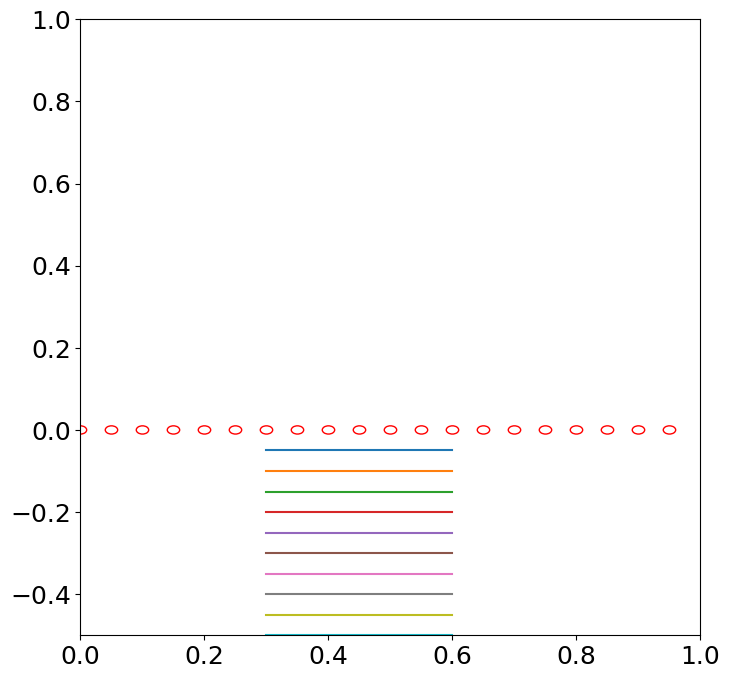

In [16]:
DefaultSize=[8,8]

font = {
        'weight' : 'regular',
        'size'   : 18}

matplotlib.rc('font', **font)
title_font = {'name':'Arial', 'size':'16'}

axis_font = {'name':'Arial', 'size':'14'}
label_font = {'name':'Arial', 'size':'14'}
fig, ax = plt.subplots()  
fig.set_size_inches( DefaultSize )# resetthe size
Size = fig.get_size_inches()
print ("Size in Inches", Size)
# print(radius)
ax= plotCrystalDiffraction(fig, ax, n=10, rays=True)
ax.set_ylim(-0.5,1.0)
ax.set_xlim(0,1.0)